### TENNIS ACE

This project aims to build a regression model to study data spanning 2009 to 2017 the behaviour of the top 1500 tennis players in ATP(Association of Tennis Professionals) and predicts outcomes dependent upon the style of play and further determines tools necessary to become one of the best tennis player's in the world.

In [32]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr

In [90]:
os.listdir()
tennis_df=pd.read_csv('Tennis_Stats.csv')
tennis_df.head()
tennis_df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

Check the relationship amongst various parameters

In [34]:
tennis_df.corr()

/var/folders/_d/d0_pf6hn3t5gl_r_tykfvcxh0000gn/T/ipykernel_44780/1976826666.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tennis_df.corr()


,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


As can be seen the number of Aces clearly determines the number of breakpoints faced by a player.

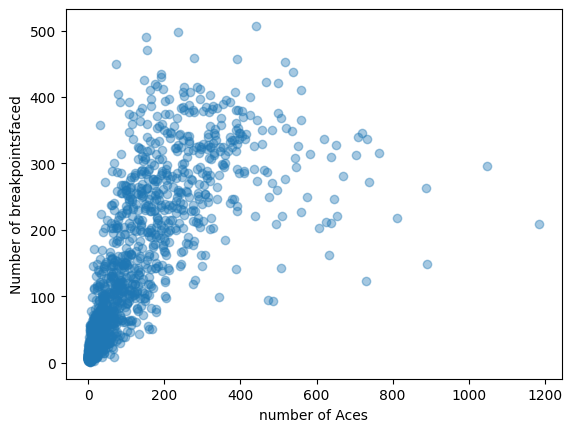

Correlation coefficient: 0.7574048474805959


In [74]:
plt.scatter(tennis_df.Aces,tennis_df.BreakPointsFaced,alpha=0.4)
plt.plot()
plt.xlabel("number of Aces")
plt.ylabel("Number of breakpointsfaced")
plt.show()
plt.close()
a,b=pearsonr(tennis_df.Aces,tennis_df.BreakPointsFaced)
print("Correlation coefficient:",a)

Make a model to predict Winnings basis Aces.

In [91]:
aces=tennis_df.Aces
winnings=tennis_df.Winnings
lr=LinearRegression()

aces=np.array(aces).reshape(-1,1)
print(aces.shape)

aces_train,aces_test,winnings_train,winnings_test=train_test_split(aces,winnings,train_size=0.8,test_size=0.2,random_state=6)
lr.fit(aces_train,winnings_train)    #train model

winnings_predicted=lr.predict(aces_test)

(1721, 1)


Check accuracy of prediction with what actually is:

In [92]:
print("Train set accuaracy score: Indicates % variation in winning brought about by aces")
print(lr.score(aces_train,winnings_train)*100)
print("Test set accuracy score:Indicates % variation in winning brought about by aces")
print(lr.score(aces_test,winnings_test)*100)

Train set accuaracy score: Indicates % variation in winning brought about by aces
65.24240883066132
Test set accuracy score:Indicates % variation in winning brought about by aces
58.16068520493389


Visualize model performance

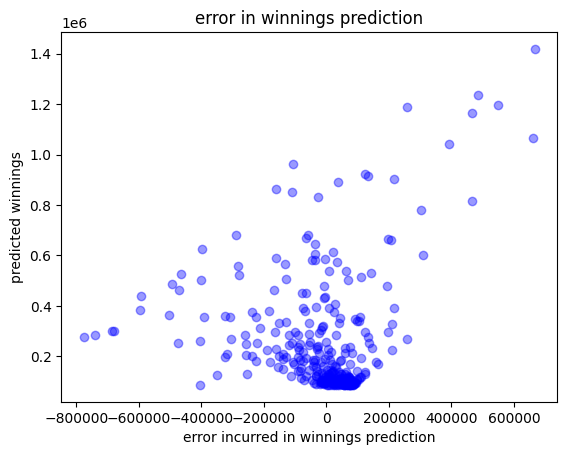

In [93]:
error=winnings_predicted-winnings_test
plt.scatter(error,winnings_predicted,alpha=0.4,color='b')
plt.title(f"error in winnings prediction")
plt.xlabel("error incurred in winnings prediction")
plt.ylabel("predicted winnings")
plt.show()
plt.close()

Display strength of model accuracy

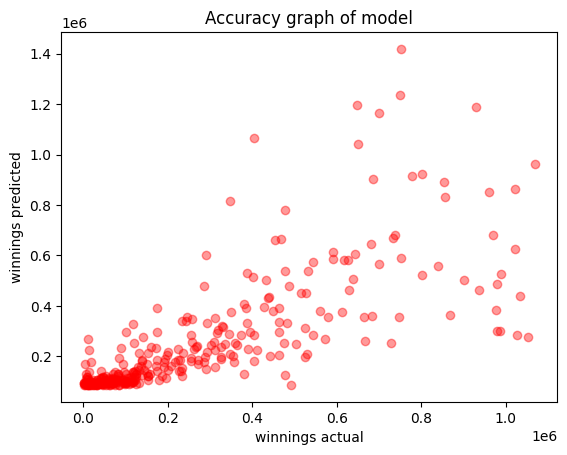

In [94]:
plt.scatter(winnings_test,winnings_predicted,alpha=0.4,color='r')
plt.title(f"Accuracy graph of model")
plt.xlabel("winnings actual")
plt.ylabel("winnings predicted")
plt.show()
plt.close()

Also is evident the strong relationship between Service game won and First Serve points won.
Build a model to predict Service game won:

In [95]:
first_serve_won=tennis_df.FirstServePointsWon
servicegame_won=tennis_df.ServiceGamesWon

first_serve_won=np.array(first_serve_won).reshape(-1,1)
type(first_serve_won)

first_serve_train,first_serve_test,servicegame_train,servicegame_test=train_test_split(first_serve_won,servicegame_won,train_size=0.8,test_size=0.2,random_state=6)

lr.fit(first_serve_train,servicegame_train)  #train model
service_game_win_predicted=lr.predict(first_serve_test)


In [96]:
print("train set accuracy:")
print(lr.score(first_serve_train,servicegame_train))
print("test set accuracy:")
print(lr.score(first_serve_test,servicegame_test))

train set accuracy:
0.6857000696745452
test set accuracy:
0.6114487007555616


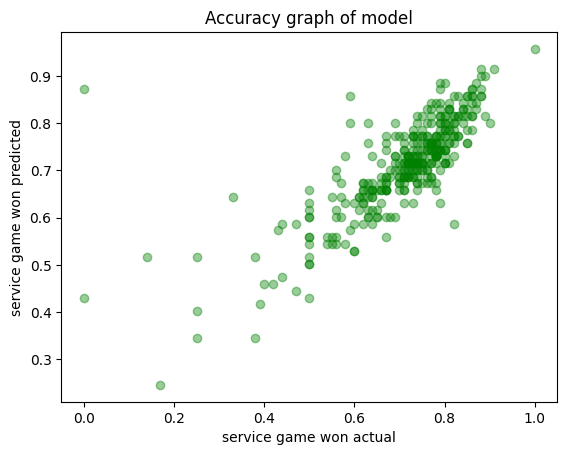

In [97]:
plt.scatter(servicegame_test,service_game_win_predicted,alpha=0.4,color='g')
plt.title(f"Accuracy graph of model")
plt.xlabel("service game won actual")
plt.ylabel("service game won predicted")
plt.show()
plt.close()

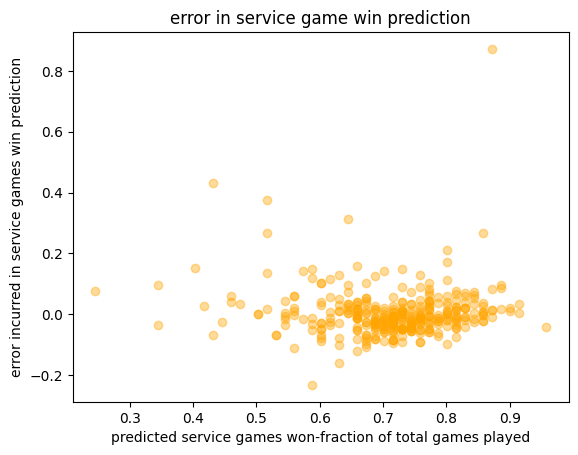

In [98]:
residue=service_game_win_predicted-servicegame_test
plt.scatter(service_game_win_predicted,residue,alpha=0.4,color='orange')
plt.title(f"error in service game win prediction")
plt.ylabel("error incurred in service games win prediction")
plt.xlabel("predicted service games won-fraction of total games played")
plt.show()
plt.close()

build a model to predict winnings of a player based off of all other parameters.

In [230]:
mlr=LinearRegression()
x=tennis_df[['Year', 'FirstServePointsWon', 'Aces',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ServiceGamesWon', 'Wins']]
y=tennis_df.Winnings
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=6)
mlr.fit(x_train,y_train)  #train model
y_predict=mlr.predict(x_test)
print(mlr.coef_)

[15003.61912676 27838.08431965    28.99863566  -174.72743784
   146.73584349  6977.50956158   530.46251719 20403.67023791
 -4689.06829789 12174.23839985]


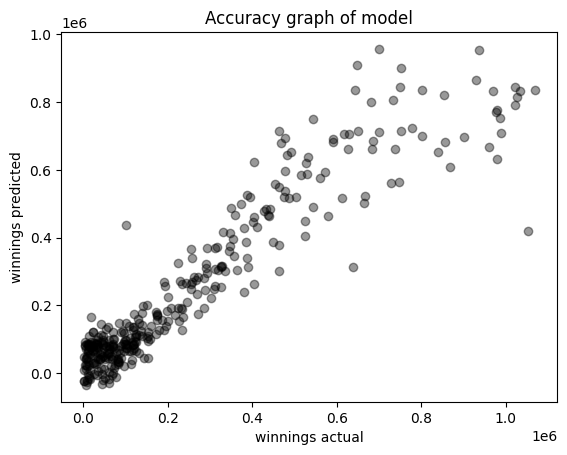

In [231]:
plt.scatter(y_test,y_predict,alpha=0.4,color="black")
plt.title(f"Accuracy graph of model")
plt.xlabel("winnings actual")
plt.ylabel("winnings predicted")
plt.show()
plt.close()

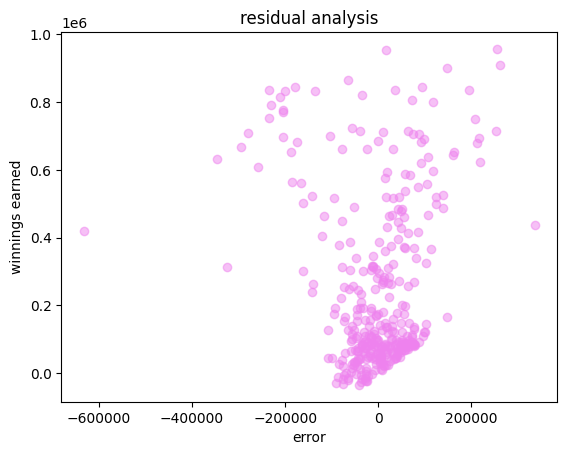

In [232]:
residual=y_predict-y_test
plt.scatter(residual,y_predict,alpha=0.5,color="violet")
plt.title("residual analysis")
plt.xlabel("error")
plt.ylabel("winnings earned")
plt.show()
plt.close()

In [233]:
print("train set accuracy:")
print(mlr.score(x_train,y_train))
print("test set accuracy:")
print(mlr.score(x_test,y_test))

train set accuracy:
0.8887547747967742
test set accuracy:
0.877650176277503


Thus the features that determines a great player of tennis are:

In [234]:
print(x.columns)

Index(['Year', 'FirstServePointsWon', 'Aces', 'BreakPointsFaced',
       'BreakPointsOpportunities', 'BreakPointsSaved', 'ReturnGamesPlayed',
       'ReturnGamesWon', 'ServiceGamesWon', 'Wins'],
      dtype='object')
